In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [9]:
df = pd.read_csv('BigBasket Products.csv')

df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [10]:
print('Her Bir Sütundaki Kayıp/Eksik Veri Sayısı')
print('-'*50)
print(df.isnull().sum())
print('-'*50)
print('Her Bir Sütundaki Kayıp/Eksik Veri Oranı (%)')
print('-'*50)
for col in df.columns:
    null_count = df[col].isnull().sum()
    total_count = df.shape[0]
    print("{} : {:.2f}".format(col,null_count/total_count * 100))

Her Bir Sütundaki Kayıp/Eksik Veri Sayısı
--------------------------------------------------
index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64
--------------------------------------------------
Her Bir Sütundaki Kayıp/Eksik Veri Oranı (%)
--------------------------------------------------
index : 0.00
product : 0.00
category : 0.00
sub_category : 0.00
brand : 0.00
sale_price : 0.00
market_price : 0.00
type : 0.00
rating : 31.30
description : 0.42


In [11]:
print(df.shape)

(27555, 10)


In [12]:
df = df.dropna()
print(df.shape)

(18840, 10)


In [13]:
df.dtypes

index             int64
product          object
category         object
sub_category     object
brand            object
sale_price      float64
market_price    float64
type             object
rating          float64
description      object
dtype: object

In [14]:
counts = df['category'].value_counts()
count_percentage = df['category'].value_counts(1)*100
counts_df = pd.DataFrame({'Category':counts.index,'Counts':counts.values,'Percent':np.round(count_percentage.values,2)})
display(counts_df)
px.bar(data_frame=counts_df,
       x='Category',
       y='Counts',
       color='Counts',
       color_continuous_scale='blues',
       title=f'Her Bir Kategorideki Ürün Sayısı')

,Category,Counts,Percent
0,Beauty & Hygiene,5460,28.98
1,"Kitchen, Garden & Pets",2494,13.24
2,Snacks & Branded Foods,2468,13.10
3,Gourmet & World Food,2364,12.55
4,"Foodgrains, Oil & Masala",2173,11.53
5,Cleaning & Household,2091,11.10
6,"Bakery, Cakes & Dairy",665,3.53
7,Beverages,630,3.34
8,Baby Care,495,2.63


In [15]:
counts = df['sub_category'].value_counts()
count_percentage = df['sub_category'].value_counts(1)*100
counts_df = pd.DataFrame({'sub_category':counts.index,'Counts':counts.values,'Percent':np.round(count_percentage.values,2)})
print('Alt Kategori Sayısı',df['sub_category'].nunique())

print('------------------------------------\n')
print('En Çok Satılan 10 Alt Kategori')
display(counts_df.head(10))

print('------------------------------------\n')
print('En Az Satılan 10 Alt Kategori')
display(counts_df.tail(10))

px.bar(data_frame=counts_df[:10],
 x='sub_category',
 y='Counts',
 color='Counts',
 color_continuous_scale='blues',
 title=f'En Çok Satılan 10 Alt Kategori')

Alt Kategori Sayısı 77
------------------------------------

En Çok Satılan 10 Alt Kategori


,sub_category,Counts,Percent
0,Skin Care,1641,8.71
1,Hair Care,818,4.34
2,Bath & Hand Wash,808,4.29
3,Masalas & Spices,764,4.06
4,Storage & Accessories,658,3.49
5,Men's Grooming,649,3.44
6,Fragrances & Deos,627,3.33
7,Crockery & Cutlery,621,3.30
8,Ready To Cook & Eat,557,2.96
9,Organic Staples,550,2.92


------------------------------------

En Az Satılan 10 Alt Kategori


,sub_category,Counts,Percent
67,Car & Shoe Care,39,0.21
68,Flask & Casserole,39,0.21
69,Bakeware,37,0.20
70,Non Dairy,31,0.16
71,Baby Accessories,27,0.14
72,Bakery Snacks,24,0.13
73,Mothers & Maternity,23,0.12
74,Water,16,0.08
75,Gourmet Breads,10,0.05
76,Cuts & Sprouts,1,0.01


In [16]:
px.bar(data_frame=counts_df[-10:],
 x='sub_category',
 y='Counts',
 color='Counts',
 color_continuous_scale='blues',
 title=f'En Az Satılan 10 Alt Kategori')

In [17]:
column = 'brand'
counts = df[column].value_counts()
count_percentage = df[column].value_counts(1)*100
counts_df = pd.DataFrame({column:counts.index,'Counts':counts.values,'Percent':np.round(count_percentage.values,2)})
print('Tekil '+str(column)+' Sayısı',df['sub_category'].nunique())

print('------------------------------------\n')
print('En Yüksek 10 '+str(column))
display(counts_df.head(10))

print('------------------------------------\n')
print('En Düşük 10 '+str(column))
display(counts_df.tail(10))
px.bar(data_frame=counts_df.head(10),
 x=column,
 y='Counts',
 color='Counts',
 color_continuous_scale='blues',
 title=f'Ürün Sayısı Bazında En Yüksek 10 Marka')

Tekil brand Sayısı 77
------------------------------------

En Yüksek 10 brand


,brand,Counts,Percent
0,bb Royal,278,1.48
1,BB Home,172,0.91
2,Amul,153,0.81
3,Himalaya,139,0.74
4,Cello,104,0.55
5,BIOTIQUE,103,0.55
6,DP,101,0.54
7,Keya,101,0.54
8,Organic Tattva,99,0.53
9,MTR,97,0.51


------------------------------------

En Düşük 10 brand


,brand,Counts,Percent
1923,Twix,1,0.01
1924,SterloMax,1,0.01
1925,Trents,1,0.01
1926,Ritebite,1,0.01
1927,Gift Basket,1,0.01
1928,Maxcare,1,0.01
1929,Odopic,1,0.01
1930,Regal Essence,1,0.01
1931,Beelicious,1,0.01
1932,Shree Mahalakshmi,1,0.01


In [18]:
column = 'type'
counts = df[column].value_counts()
count_percentage = df[column].value_counts(1)*100
counts_df = pd.DataFrame({column:counts.index,'Counts':counts.values,'Percent':np.round(count_percentage.values,2)})
print('Tekil '+str(column)+' Sayısı',df[column].nunique())

print('------------------------------------\n')

print('En Yüksek 10 '+str(column))
display(counts_df.head(10))
counts_df[counts_df['Counts']==1].shape
px.bar(data_frame=counts_df.head(10),
 x='type',
 y='Counts',
 color='Counts',
 color_continuous_scale='blues',
 title=f'Ürün Sayısı Bazında En Yüksek 10 Ürün Tipi')

Tekil type Sayısı 358
------------------------------------

En Yüksek 10 type


,type,Counts,Percent
0,Face Care,1094,5.81
1,Men's Deodorants,404,2.14
2,Shampoo & Conditioner,390,2.07
3,Blended Masalas,343,1.82
4,Containers Sets,332,1.76
5,Bathing Bars & Soaps,322,1.71
6,Glassware,263,1.40
7,Body Care,251,1.33
8,Namkeen & Savoury Snacks,234,1.24
9,Hand Wash & Sanitizers,212,1.13


count    18840.000000
mean         3.943063
std          0.739646
min          1.000000
25%          3.700000
50%          4.100000
75%          4.300000
max          5.000000
Name: rating, dtype: float64


<AxesSubplot:>

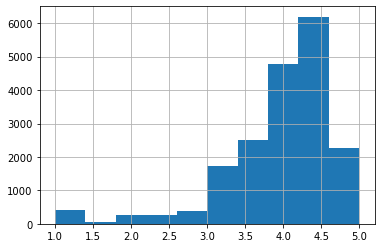

In [19]:
print(df['rating'].describe())
df['rating'].hist(bins=10)

In [20]:
pd.cut(df.rating,bins = [0,1,2,3,4,5]).reset_index().groupby(['rating']).size()

rating
(0, 1]      387
(1, 2]      335
(2, 3]     1347
(3, 4]     6559
(4, 5]    10212
dtype: int64

In [21]:
df['discount'] = (df['market_price']-df['sale_price'])*100/df['market_price']
print(df['discount'].describe())
pd.cut(df.discount,bins = [-1,0,10,20,30,40,50,60,80,90,100]).reset_index().groupby(['discount']).size()

count    18840.000000
mean        11.751733
std         14.546937
min          0.000000
25%          0.000000
50%          5.000000
75%         20.000000
max         82.506266
Name: discount, dtype: float64


discount
(-1, 0]      8157
(0, 10]      3125
(10, 20]     2962
(20, 30]     2435
(30, 40]     1126
(40, 50]      700
(50, 60]      223
(60, 80]      108
(80, 90]        4
(90, 100]       0
dtype: int64

<AxesSubplot:>

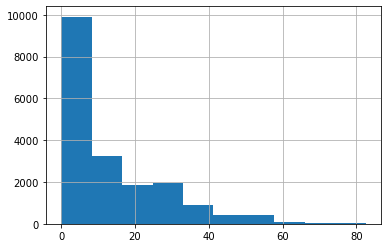

In [22]:
df['discount'].hist()

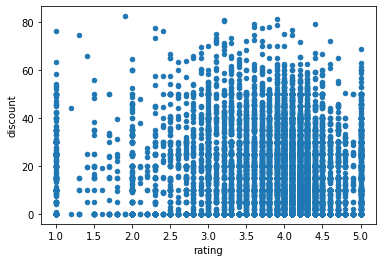

In [24]:
ax = df.plot.scatter(x='rating',y='discount')

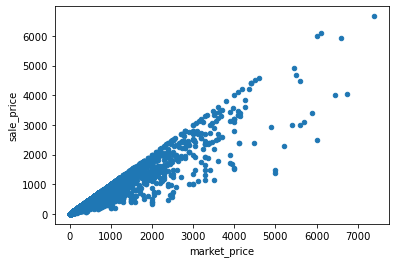

In [25]:
ax = df.plot.scatter(x='market_price',y='sale_price')

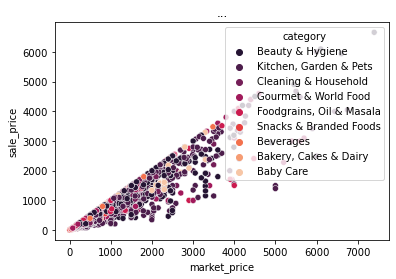

In [40]:
sns.scatterplot(x='market_price', y='sale_price', hue='category', data=df, palette = "rocket")
plt.title('...')
plt.show()

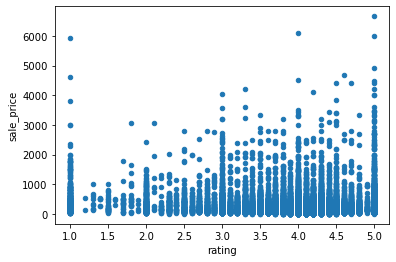

In [26]:
ax = df.plot.scatter(x='rating',y='sale_price')

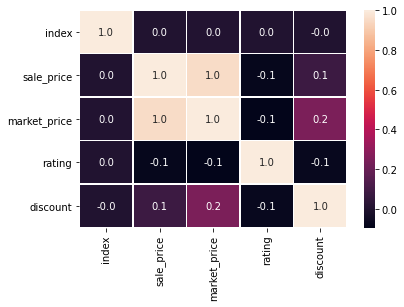

In [29]:
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.show()

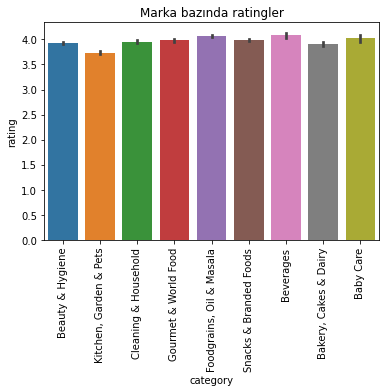

In [32]:
#index             int64
#product          object
#category         object
#sub_category     object
#brand            object
#sale_price      float64
#market_price    float64
#type             object
#rating          float64
#description      object
#dtype: object
    
sns.barplot(x="category", y="rating", data=df)
plt.title("Kategori bazında ratingler")
plt.xticks(rotation = 90)
plt.show()

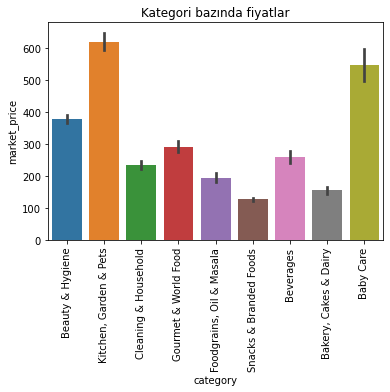

In [35]:
sns.barplot(x="category", y="market_price", data=df)
plt.title("Kategori bazında fiyatlar")
plt.xticks(rotation = 90)
plt.show()

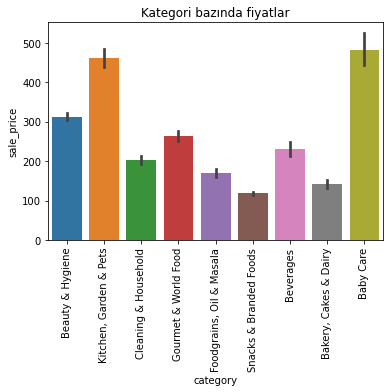

In [37]:
sns.barplot(x="category", y="sale_price", data=df)
plt.title("Kategori bazında fiyatlar")
plt.xticks(rotation = 90)
plt.show()

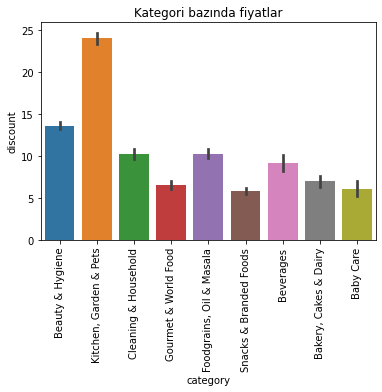

In [36]:
sns.barplot(x="category", y="discount", data=df)
plt.title("Kategori bazında fiyatlar")
plt.xticks(rotation = 90)
plt.show()

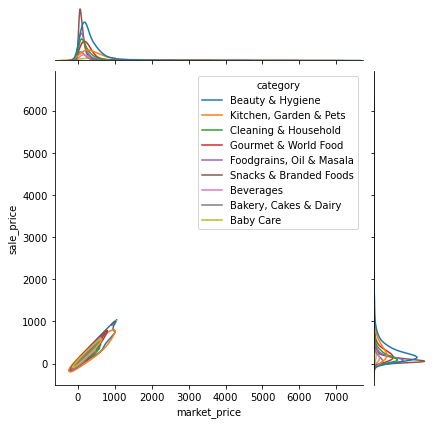

In [38]:
sns.jointplot(
    data=df,
    x="market_price", y="sale_price", hue="category",
    kind="kde")
plt.show()